In [1]:
from smart_open import open
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize

# Load data for all positions

In [2]:
data = pd.read_csv("../data/training_pruned_file_20162021.csv")

In [3]:
players = data

In [4]:
sorted(players.columns.values)

['accurate_crosses.total',
 'accurate_passes.total',
 'aerials_won.total',
 'agent_name',
 'bench.total',
 'big_chances_created.total',
 'big_chances_missed.total',
 'birth.country',
 'blocked_shots.total',
 'captain.total',
 'cards.red',
 'cards.yellow',
 'cards.yellowred',
 'clearances.total',
 'common_name',
 'continent',
 'country_name',
 'date',
 'date_of_birth',
 'dispossessed.total',
 'dribbled_past.total',
 'dribbles.attempts',
 'dribbles.past',
 'dribbles.success',
 'duels.total',
 'duels.won',
 'duels_won.total',
 'error_lead_to_goal.total',
 'firstname_x',
 'foot',
 'fouls.committed',
 'fouls.drawn',
 'fouls.total',
 'fouls_drawn.total',
 'games.appearences',
 'games.captain',
 'games.lineups',
 'games.minutes',
 'games.number',
 'games.position',
 'games.rating',
 'gender',
 'global_performance',
 'goals.assists',
 'goals.conceded',
 'goals.goals',
 'goals.penalties',
 'goals.saves',
 'goals.total_y',
 'height_x',
 'highest_market_value_in_eur',
 'hit_woodwork.total',
 'int

In [5]:
data["league_name"].unique()

array(['Premier League', 'Ligue 1', 'Bundesliga', 'Serie A', 'La Liga'],
      dtype=object)

## Select variables

In [6]:
players_selected_vars = players[[
    "name",
    "player_id_api",
    "date_of_birth",
    "nationality",
    "team_name",
    'league_name',
     'league.season',
    # "error_lead_to_goal.total",
    # "saves_inside_box.total",
    "games.appearences",
    "games.lineups",
    "games.minutes",
    # "goals.conceded",
    # "goals.saves",
    # "penalty.saved",
    # "highest_market_value_in_eur",
    "market_value_in_eur_x",
    # "own_goals.total",
    "position",
    "position_name_y",
    "height_x",
    "accurate_crosses.total",
    "accurate_passes.total",
    "aerials_won.total",
    "big_chances_created.total",
    "big_chances_missed.total",
    "blocked_shots.total",
    "clearances.total",
    "dribbled_past.total",
    "duels_won.total",
    "error_lead_to_goal.total",
    "fouls.total",
    "goals.goals",
    "interceptions.total",
    "offsides.total",
    "redcards.away",
    "redcards.home",
    "redcards.total",
    "saves_inside_box.total",
    "shots_off_target.total",
    "tackles.total_x",
    "through_balls.total",
    "total_crosses.total",
    "total_duels.total",
    "yellowcards.away",
    "yellowcards.home",
    "yellowcards.total",
    "yellowred_cards.away",
    "yellowred_cards.home",
    "yellowred_cards.total",
    "shots.total",
    "shots.on",
    "goals.total_y",
    "goals.conceded",
    "goals.assists",
    "goals.saves",
    "passes.total_y",
    "passes.key",
    "passes.accuracy",
    "tackles.total_y",
    "tackles.blocks",
    "tackles.interceptions",
    "duels.total",
    "duels.won",
    "dribbles.attempts",
    "dribbles.success",
    "dribbles.past",
    "fouls.committed",
    "cards.yellow",
    "cards.yellowred",
    "cards.red",
    "penalty.commited",
    "penalty.saved",
]].copy().rename({
    "team_name": "team",
    "league_name": "league",
    "league.season": "season",
    "games.appearences": "matches_played",
    "games.lineups": "matches_started",
    "games.minutes": "minutes",
    # "goals.conceded": "goals_against",
    # "goals.saves": "saves",
    # "saves_inside_box.total": "saves_inside_box",
    # "penalty.saved": "penalty_kicks_saves",
    # "own_goals.total": "own_goals_against",
    # "error_lead_to_goal.total": "errors_to_goal",
    "market_value_in_eur_x": "market_value",
}, axis=1)
players_selected_vars["90s_played"] = players_selected_vars["minutes"] / 90
# players_selected_vars["goals_against_90s"] = players_selected_vars["goals_against"] / players_selected_vars["90s_played"]
# players_selected_vars["shots_on_target_against"] = players_selected_vars["goals_against"] + players_selected_vars["saves"]
# players_selected_vars["save%"] = players_selected_vars["saves"] / players_selected_vars["shots_on_target_against"]
players_selected_vars["age"] = pd.to_datetime(players_selected_vars["date_of_birth"]).map(lambda x: int((pd.Timestamp.today() - x).days / 365))
# players_selected_vars["own_goals_against"] = players_selected_vars["own_goals_against"].fillna(0)
for per_90 in [
    # "shots_on_target_against",
    # "saves_inside_box",
    # "saves",
    # "penalty_kicks_saves",
    # "own_goals_against",
    # "goals_against",
    # "accurate_crosses.total",
    # "big_chances_created.total",
    # "big_chances_missed.total",
    # "blocked_shots.total",
    # "dribbled_past.total",
    # "goals.goals",
    # "offsides.total",
    # "shots_off_target.total",
    # "through_balls.total",
    # "total_crosses.total",
    # "shots.total",
    # "shots.on",
    # "goals.total_y",
    # "goals.assists",
    # "passes.key",
    # "dribbles.attempts",
    # "dribbles.success",
    # "dribbles.past",
]:
    players_selected_vars[per_90] = players_selected_vars[per_90] / players_selected_vars["90s_played"]


players_selected_vars.replace([np.inf, -np.inf], np.nan, inplace=True)
    
players_selected_vars = players_selected_vars.drop([
    "date_of_birth",
    "minutes",
], axis=1)

order = [
    "name",
    "player_id_api",
    "age",
    "nationality",
    "league",
    "team",
    "season",
    "matches_played",
    "matches_started",
    # "minutes",
    "90s_played",
    # "goals_against",
    # "own_goals_against",
    # "shots_on_target_against",
    # "saves",
    # "save%",
    # "saves_inside_box",
    # "penalty_kicks_saves",
    "market_value",
    "position",
    "position_name_y",
    "height_x",
    "accurate_crosses.total",
    "accurate_passes.total",
    "aerials_won.total",
    "big_chances_created.total",
    "big_chances_missed.total",
    "blocked_shots.total",
    "clearances.total",
    "dribbled_past.total",
    "duels_won.total",
    "error_lead_to_goal.total",
    "fouls.total",
    "goals.goals",
    "interceptions.total",
    "offsides.total",
    "redcards.away",
    "redcards.home",
    "redcards.total",
    "saves_inside_box.total",
    "shots_off_target.total",
    "tackles.total_x",
    "through_balls.total",
    "total_crosses.total",
    "total_duels.total",
    "yellowcards.away",
    "yellowcards.home",
    "yellowcards.total",
    "yellowred_cards.away",
    "yellowred_cards.home",
    "yellowred_cards.total",
    "shots.total",
    "shots.on",
    "goals.total_y",
    "goals.conceded",
    "goals.assists",
    "goals.saves",
    "passes.total_y",
    "passes.key",
    "passes.accuracy",
    "tackles.total_y",
    "tackles.blocks",
    "tackles.interceptions",
    "duels.total",
    "duels.won",
    "dribbles.attempts",
    "dribbles.success",
    "dribbles.past",
    "fouls.committed",
    "cards.yellow",
    "cards.yellowred",
    "cards.red",
    "penalty.commited",
    "penalty.saved",
]
players_selected_vars = players_selected_vars[order + list(set(players_selected_vars.columns).difference(order))]
players_selected_vars

,name,player_id_api,age,nationality,league,team,season,matches_played,matches_started,90s_played,...,duels.won,dribbles.attempts,dribbles.success,dribbles.past,fouls.committed,cards.yellow,cards.yellowred,cards.red,penalty.commited,penalty.saved
0,George Thomas,20479,26,Wales,Premier League,Leicester City,2017,0.0,0.0,0.000000,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN
1,Harvey Lewis Barnes,18778,25,England,Premier League,Leicester City,2017,3.0,0.0,0.077778,...,1.0,0.0,0.0,NaN,1.0,0.0,0.0,0.0,NaN,NaN
2,Andy King,19217,34,Wales,Premier League,Leicester City,2017,11.0,9.0,7.977778,...,24.0,4.0,1.0,NaN,5.0,1.0,0.0,0.0,NaN,NaN
3,Marc Albrighton,18777,33,England,Premier League,Leicester City,2017,34.0,30.0,28.266667,...,140.0,95.0,52.0,NaN,20.0,5.0,0.0,1.0,1.0,NaN
4,Kelechi Promise Iheanacho,2778,26,Nigeria,Premier League,Leicester City,2017,21.0,7.0,9.144444,...,37.0,18.0,13.0,NaN,17.0,2.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14768,Matěj Vydra,18930,31,Czech Republic,Premier League,Burnley,2021,22.0,5.0,7.400000,...,44.0,14.0,6.0,NaN,9.0,1.0,0.0,0.0,NaN,NaN
14769,Josh Brownhill,19268,27,England,Premier League,Burnley,2021,35.0,32.0,32.811111,...,155.0,30.0,15.0,NaN,39.0,10.0,0.0,0.0,NaN,NaN
14770,Ashley Barnes,18927,33,England,Premier League,Burnley,2021,23.0,8.0,8.888889,...,77.0,8.0,5.0,NaN,21.0,4.0,0.0,0.0,NaN,NaN
14771,Wout Weghorst,25416,30,Netherlands,Premier League,Burnley,2021,18.0,17.0,17.244444,...,96.0,8.0,7.0,NaN,17.0,2.0,0.0,0.0,NaN,NaN


In [7]:
from helpers import TEAM_TIERS

In [8]:
players_selected_vars = pd.merge(players_selected_vars, TEAM_TIERS, left_on="team", right_index=True)

In [9]:
mvs = players_selected_vars["market_value"].values
mvs = np.expand_dims(mvs, axis=1)
mvs = normalize(mvs, norm="max", axis=0)
mvs = np.squeeze(mvs)
players_selected_vars["normalised_market_value"] = mvs

In [10]:
from sklearn.compose import ColumnTransformer
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.impute import SimpleImputer
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score, balanced_accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

## Transformation pipeline

In [140]:
numeric_features = [
    "age",
    "matches_played",
    "matches_started",
    "90s_played",
    # "goals_against",
    # "own_goals_against",
    # "shots_on_target_against",
    # "saves",
    # "save%",
    # "saves_inside_box",
    # "penalty_kicks_saves",
    "height_x",
    "accurate_crosses.total",
    "accurate_passes.total",
    "aerials_won.total",
    "big_chances_created.total",
    "big_chances_missed.total",
    "blocked_shots.total",
    "clearances.total",
    "dribbled_past.total",
    "duels_won.total",
    "error_lead_to_goal.total",
    "fouls.total",
    "goals.goals",
    "interceptions.total",
    "offsides.total",
    "redcards.away",
    "redcards.home",
    "redcards.total",
    "saves_inside_box.total",
    "shots_off_target.total",
    "tackles.total_x",
    "through_balls.total",
    "total_crosses.total",
    "total_duels.total",
    "yellowcards.away",
    "yellowcards.home",
    "yellowcards.total",
    "yellowred_cards.away",
    "yellowred_cards.home",
    "yellowred_cards.total",
    "shots.total",
    "shots.on",
    "goals.total_y",
    "goals.conceded",
    "goals.assists",
    "goals.saves",
    "passes.total_y",
    "passes.key",
    "passes.accuracy",
    "tackles.total_y",
    "tackles.blocks",
    "tackles.interceptions",
    "duels.total",
    "duels.won",
    "dribbles.attempts",
    "dribbles.success",
    "dribbles.past",
    "fouls.committed",
    "cards.yellow",
    "cards.yellowred",
    "cards.red",
    "penalty.commited",
    "penalty.saved",
]
numeric_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ]
)

categorical_features = [
    "nationality",
    "league",
    "team",
    "tier",
    "position",
    "position_name_y",
]
categorical_transformer = Pipeline(
    steps=[
        ("encoder", OneHotEncoder(handle_unknown="ignore"))
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

# Predict price bucket

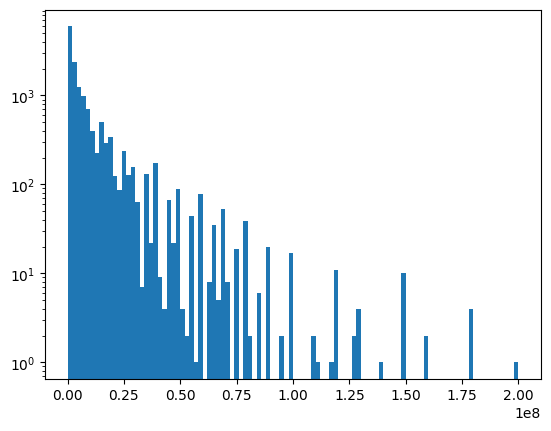

In [337]:
plt.hist(players_selected_vars["market_value"], bins=100)
# plt.xlim((0, 0.5e8))
plt.yscale("log")

In [328]:
# bins = [
#     0.0025,
#     0.005,
#     0.01,
#     0.025,
#     0.05, # 
#     0.1, # 8 - 20
#     0.25, # 20 - 40
#     0.5,  # 40 -80
#     1.0  # 80M
# ]
# y = np.digitize(players_selected_vars["normalised_market_value"], bins)
bins = np.concatenate([
    np.arange(200_000, 4_000_000, 200_000),
    np.arange(4_000_000, 20_000_000, 2_000_000),
    np.arange(20_000_000, 100_000_000, 5_000_000),
    np.arange(100_000_000, 200_000_001, 10_000_000)
])
y = np.digitize(players_selected_vars["market_value"], bins)
X = players_selected_vars

In [329]:
bins

array([   200000,    400000,    600000,    800000,   1000000,   1200000,
         1400000,   1600000,   1800000,   2000000,   2200000,   2400000,
         2600000,   2800000,   3000000,   3200000,   3400000,   3600000,
         3800000,   4000000,   6000000,   8000000,  10000000,  12000000,
        14000000,  16000000,  18000000,  20000000,  25000000,  30000000,
        35000000,  40000000,  45000000,  50000000,  55000000,  60000000,
        65000000,  70000000,  75000000,  80000000,  85000000,  90000000,
        95000000, 100000000, 110000000, 120000000, 130000000, 140000000,
       150000000, 160000000, 170000000, 180000000, 190000000, 200000000])

In [287]:
# list(map(lambda x: f"{int((bins[x] if x != len(bins) else 1.0) * 80_000_000):,}", np.digitize(players_selected_vars["normalised_market_value"], bins)))

In [330]:
goalkeepers = (X["position"] == "Goalkeeper").values
attackers = (X["position"] == "Attack").values
defenders = (X["position"] == "Defender").values
midfielders = (X["position"] == "Midfield").values

(
    X_train, X_test, 
    y_train, y_test, 
    goalkeepers_train, goalkeepers_test,
    attackers_train, attackers_test,
    defenders_train, defenders_test, 
    midfielders_train, midfielders_test
) = train_test_split(
    X, y, 
    goalkeepers, attackers, defenders, midfielders,
    test_size=0.2, random_state=42
)

In [331]:
np.unique(y_train, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        52, 54]),
 array([ 607,  832,  559,  350,  412,  503,  268,  471,  141,  121,  522,
          77,  480,   21,   74,  450,   94,  237,   24,    7, 1183,  718,
         566,  386,  357,  367,  178,  175,  441,  284,  180,  128,  152,
          73,   75,   34,   66,   29,   49,   14,   31,    5,   17,    2,
          12,    4,    9,    1,    1,    8,    2,    4,    1]))

In [332]:
random = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("classifier", DummyClassifier(strategy="stratified")),
    ]
)
random.fit(X_train, y_train)

y_random = random.predict(X_test)

balanced_accuracy_score(y_test, y_random)

/Users/jwasilewski/Library/Caches/pypoetry/virtualenvs/models-wTMcHaj6-py3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


0.017283268513967196

In [333]:
for name, selector in {
    "goalkeepers": goalkeepers_test, 
    "attackers": attackers_test, 
    "defenders": defenders_test,
    "midfielders": midfielders_test
}.items():
    print(name, balanced_accuracy_score(y_test[selector], random.predict(X_test[selector])))

goalkeepers 0.02217571031909267
attackers 0.01867301512549001
defenders 0.01819555170797969
midfielders 0.02571011662878361


/Users/jwasilewski/Library/Caches/pypoetry/virtualenvs/models-wTMcHaj6-py3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/Users/jwasilewski/Library/Caches/pypoetry/virtualenvs/models-wTMcHaj6-py3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/Users/jwasilewski/Library/Caches/pypoetry/virtualenvs/models-wTMcHaj6-py3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/Users/jwasilewski/Library/Caches/pypoetry/virtualenvs/models-wTMcHaj6-py3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains 

In [323]:
clf = Pipeline(
    steps=[
        ("preprocessor", preprocessor), 
        ("classifier", LogisticRegression()),
    ]
)
clf.fit(X_train, y_train)

y_lr = clf.predict(X_test)

balanced_accuracy_score(y_test, y_lr)

/Users/jwasilewski/Library/Caches/pypoetry/virtualenvs/models-wTMcHaj6-py3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/jwasilewski/Library/Caches/pypoetry/virtualenvs/models-wTMcHaj6-py3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


0.08591455042229648

In [324]:
for name, selector in {
    "goalkeepers": goalkeepers_test, 
    "attackers": attackers_test, 
    "defenders": defenders_test,
    "midfielders": midfielders_test
}.items():
    print(name, balanced_accuracy_score(y_test[selector], clf.predict(X_test[selector])))

goalkeepers 0.13313533049786247
attackers 0.07234309111829633
defenders 0.10885014660621455
midfielders 0.08578202564355655


/Users/jwasilewski/Library/Caches/pypoetry/virtualenvs/models-wTMcHaj6-py3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/Users/jwasilewski/Library/Caches/pypoetry/virtualenvs/models-wTMcHaj6-py3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/Users/jwasilewski/Library/Caches/pypoetry/virtualenvs/models-wTMcHaj6-py3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Only model specific to goalkeepers performs better on that position than the "all positions" model.
Performance on other positions is similar or marginally better with the generic model.

In [325]:
from sklearn.neural_network import MLPClassifier

mlp = Pipeline(
    steps=[
        ("preprocessor", preprocessor), 
        ("classifier", MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(16, 8))),
    ]
)
mlp.fit(X_train, y_train)

y_mlp = mlp.predict(X_test)

balanced_accuracy_score(y_test, y_mlp)

/Users/jwasilewski/Library/Caches/pypoetry/virtualenvs/models-wTMcHaj6-py3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/jwasilewski/Library/Caches/pypoetry/virtualenvs/models-wTMcHaj6-py3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


0.10335703168338255

In [326]:
for name, selector in {
    "goalkeepers": goalkeepers_test, 
    "attackers": attackers_test, 
    "defenders": defenders_test,
    "midfielders": midfielders_test
}.items():
    print(name, balanced_accuracy_score(y_test[selector], mlp.predict(X_test[selector])))

goalkeepers 0.13193128003709848
attackers 0.0956601266221791
defenders 0.11687785129891978
midfielders 0.11810475451003156


/Users/jwasilewski/Library/Caches/pypoetry/virtualenvs/models-wTMcHaj6-py3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/Users/jwasilewski/Library/Caches/pypoetry/virtualenvs/models-wTMcHaj6-py3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/Users/jwasilewski/Library/Caches/pypoetry/virtualenvs/models-wTMcHaj6-py3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Models specific for goalkeeprs and midfielders are slighlty better than one generic model.

In [334]:
from xgboost import XGBClassifier

xgboost = Pipeline(
    steps=[
        ("preprocessor", preprocessor), 
        ("classifier", XGBClassifier(learning_rate=1)),
    ]
)
xgboost.fit(X_train, y_train)

y_xgboost = xgboost.predict(X_test)

balanced_accuracy_score(y_test, y_xgboost)

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52], got [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 52 54]

In [249]:
for name, selector in {
    "goalkeepers": goalkeepers_test, 
    "attackers": attackers_test, 
    "defenders": defenders_test,
    "midfielders": midfielders_test
}.items():
    print(name, balanced_accuracy_score(y_test[selector], xgboost.predict(X_test[selector])))

goalkeepers 0.4173494066072344
attackers 0.41768005278986664
defenders 0.4731165391130655
midfielders 0.4011867002638162


In [253]:
from collections import defaultdict
arr = np.zeros((10, 10))
for a, b in zip(y_test, y_xgboost):
    arr[a, b] = arr[a, b] + 1

In [254]:
arr

array([[327.,  59.,  25.,  20.,   5.,   1.,   0.,   0.,   0.,   0.],
       [ 60.,  80.,  67.,  46.,  12.,   1.,   0.,   0.,   0.,   0.],
       [ 32.,  61., 111., 163.,  14.,   1.,   0.,   0.,   0.,   0.],
       [ 16.,  41.,  70., 330., 101.,  36.,   4.,   0.,   0.,   0.],
       [  4.,   6.,  21., 147., 178.,  85.,  11.,   1.,   0.,   0.],
       [  0.,   4.,   9.,  41., 109., 144.,  90.,   3.,   0.,   0.],
       [  0.,   1.,   2.,  11.,  24.,  66., 189.,  17.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   4.,  52.,  34.,   1.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   1.,   5.,   4.,   4.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]])

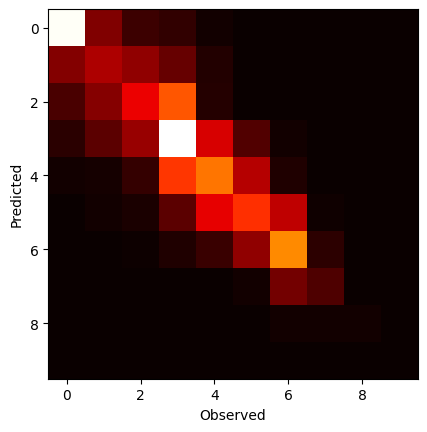

In [255]:
plt.imshow(arr, cmap='hot')
plt.xlabel("Observed")
plt.ylabel("Predicted")
_ = plt.show()

In [258]:
x = np.unique(y_test - y_xgboost, return_counts=True)
a, b =x

In [259]:
cnt = 0
for q,w in zip(a, b):
    print(q, w)
    cnt += w
cnt

-5 1
-4 6
-3 38
-2 135
-1 583
0 1397
1 569
2 168
3 43
4 10
5 1


2951

In [260]:
(583 + 1397 + 569) / 2951

0.8637749915282955

In [24]:
np.unique(y_lr, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 array([538, 143, 272, 828, 393, 325, 386,  58,   8]))

## Features importance

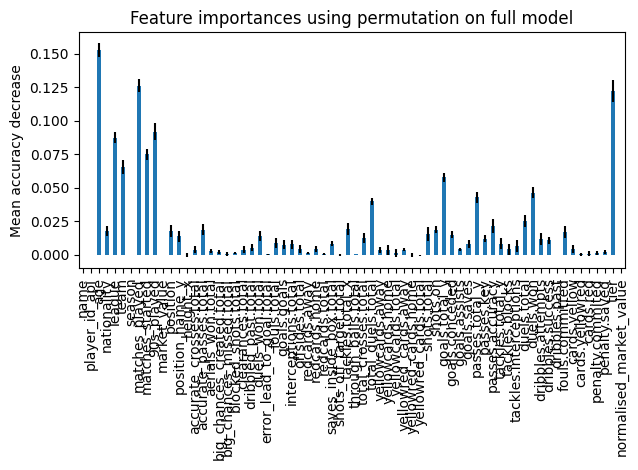

In [84]:
result = permutation_importance(
    mlp, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)

forest_importances = pd.Series(result.importances_mean, index=X_test.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

# Predict market value

In [199]:
def r2_adj(model, x,y):
    r2 = model.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    return 1-(1-r2)*(n-1)/(n-p-1)

In [226]:
X = players_selected_vars
# y = players_selected_vars["normalised_market_value"]
y = np.log(players_selected_vars["market_value"])

In [227]:
goalkeepers = (X["position"] == "Goalkeeper").values
attackers = (X["position"] == "Attack").values
defenders = (X["position"] == "Defender").values
midfielders = (X["position"] == "Midfield").values

(
    X_train, X_test, 
    y_train, y_test, 
    goalkeepers_train, goalkeepers_test,
    attackers_train, attackers_test,
    defenders_train, defenders_test, 
    midfielders_train, midfielders_test
) = train_test_split(
    X, y, 
    goalkeepers, attackers, defenders, midfielders,
    test_size=0.2, random_state=42
)

In [228]:
random_regression = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("regression", DummyRegressor()),
    ]
)
random_regression.fit(X_train, y_train)

random_regression.score(X_test, y_test), r2_adj(random_regression, X_test, y_test)

(-5.984371178446857e-05, -0.023655981592562103)

In [229]:
for name, selector in {
    "goalkeepers": goalkeepers_test, 
    "attackers": attackers_test, 
    "defenders": defenders_test,
    "midfielders": midfielders_test
}.items():
    print(name, random_regression.score(X_test[selector], y_test[selector]), r2_adj(random_regression, X_test[selector], y_test[selector]))

goalkeepers -0.35104002238191967 -0.7244982399509057
attackers -0.04414936665434954 -0.12613800052559188
defenders -0.00023979991437350634 -0.07153571856655105
midfielders -0.0013647317536018555 -0.11317557208076923


In [230]:
regression = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("regression", LinearRegression()),
    ]
)
regression.fit(X_train, y_train)

regression.score(X_test, y_test), r2_adj(regression, X_test, y_test)

(0.6892774137780275, 0.6819459995299033)

In [231]:
for name, selector in {
    "goalkeepers": goalkeepers_test, 
    "attackers": attackers_test, 
    "defenders": defenders_test,
    "midfielders": midfielders_test
}.items():
    print(name, regression.score(X_test[selector], y_test[selector]), r2_adj(regression, X_test[selector], y_test[selector]))

goalkeepers 0.7192443211335011 0.6416370603086152
attackers 0.6545349371170643 0.627408350193231
defenders 0.6655286997012706 0.6416879780866861
midfielders 0.6682375890026495 0.6311935102705972


Only model specific for midfielder is slightly better than the generic one.

In [232]:
from sklearn.neural_network import MLPRegressor

mlp_reg = Pipeline(
    steps=[
        ("preprocessor", preprocessor), 
        ("regression", MLPRegressor(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(16, 8))),
    ]
)
mlp_reg.fit(X_train, y_train)

mlp_reg.score(X_test, y_test), r2_adj(mlp_reg, X_test, y_test)

/Users/jwasilewski/Library/Caches/pypoetry/virtualenvs/models-wTMcHaj6-py3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


(0.8181813060503833, 0.8138913438059093)

In [233]:
for name, selector in {
    "goalkeepers": goalkeepers_test, 
    "attackers": attackers_test, 
    "defenders": defenders_test,
    "midfielders": midfielders_test
}.items():
    print(name, mlp_reg.score(X_test[selector], y_test[selector]), r2_adj(mlp_reg, X_test[selector], y_test[selector]))

goalkeepers 0.8142700123670981 0.7629300157856455
attackers 0.8022125374909467 0.7866818822361943
defenders 0.8029698646472202 0.788925787913479
midfielders 0.8139010470150685 0.7931215251711025


"All positions" model performs better than position specific models.

In [234]:
from xgboost import XGBRegressor

xgboost = Pipeline(
    steps=[
        ("preprocessor", preprocessor), 
        ("regression", XGBRegressor()),
    ]
)
xgboost.fit(X_train, y_train)

xgboost.score(X_test, y_test), r2_adj(xgboost, X_test, y_test)

(0.826032476939565, 0.8219277609200961)

In [235]:
for name, selector in {
    "goalkeepers": goalkeepers_test, 
    "attackers": attackers_test, 
    "defenders": defenders_test,
    "midfielders": midfielders_test
}.items():
    print(name, xgboost.score(X_test[selector], y_test[selector]), r2_adj(xgboost, X_test[selector], y_test[selector]))

goalkeepers 0.8309950663191341 0.7842782553829598
attackers 0.8050293871906106 0.789719916438834
defenders 0.7967749353142428 0.78228929129052
midfielders 0.842660525149084 0.8250922422429061


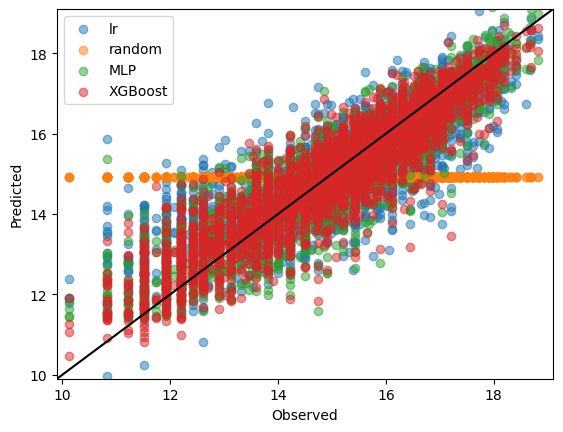

In [236]:
plt.scatter(y_test, regression.predict(X_test), alpha=0.5, label="lr")
plt.scatter(y_test, random_regression.predict(X_test), alpha=0.5, label="random")
plt.scatter(y_test, mlp_reg.predict(X_test), alpha=0.5, label="MLP")
plt.scatter(y_test, xgboost.predict(X_test), alpha=0.5, label="XGBoost")
plt.axline((0, 0), (1, 1), c="k")
plt.xlim(np.floor(y_test.min())-0.1, np.ceil(y_test.max())+0.1)
plt.ylim(np.floor(y_test.min())-0.1, np.ceil(y_test.max())+0.1)
plt.xlabel("Observed")
plt.ylabel("Predicted")
plt.legend()
_ = plt.show()

## Features importance

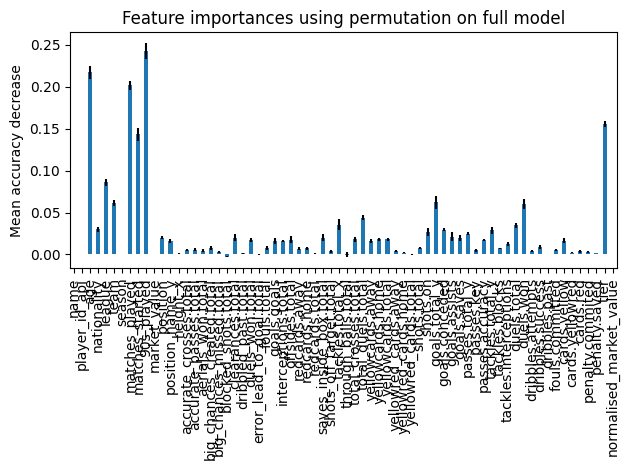

In [103]:
result = permutation_importance(
    mlp_reg, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)

forest_importances = pd.Series(result.importances_mean, index=X_test.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

# Predict change in market value between seasons

In [168]:
before_after_seasons = pd.merge(
    players_selected_vars, 
    players_selected_vars, 
    on="player_id_api", 
    suffixes=["_before", "_after"]
).query("season_after - season_before == 1")

In [169]:
numeric_features_ba = [
    f"{c}_{suffix}" for c in [
        "age",
        "matches_played",
        "matches_started",
        "90s_played",
        # "goals_against",
        # "own_goals_against",
        # "shots_on_target_against",
        # "saves",
        # "save%",
        # "saves_inside_box",
        # "penalty_kicks_saves",
    "height_x",
    "accurate_crosses.total",
    "accurate_passes.total",
    "aerials_won.total",
    "big_chances_created.total",
    "big_chances_missed.total",
    "blocked_shots.total",
    "clearances.total",
    "dribbled_past.total",
    "duels_won.total",
    "error_lead_to_goal.total",
    "fouls.total",
    "goals.goals",
    "interceptions.total",
    "offsides.total",
    "redcards.away",
    "redcards.home",
    "redcards.total",
    "saves_inside_box.total",
    "shots_off_target.total",
    "tackles.total_x",
    "through_balls.total",
    "total_crosses.total",
    "total_duels.total",
    "yellowcards.away",
    "yellowcards.home",
    "yellowcards.total",
    "yellowred_cards.away",
    "yellowred_cards.home",
    "yellowred_cards.total",
    "shots.total",
    "shots.on",
    "goals.total_y",
    "goals.conceded",
    "goals.assists",
    "goals.saves",
    "passes.total_y",
    "passes.key",
    "passes.accuracy",
    "tackles.total_y",
    "tackles.blocks",
    "tackles.interceptions",
    "duels.total",
    "duels.won",
    "dribbles.attempts",
    "dribbles.success",
    "dribbles.past",
    "fouls.committed",
    "cards.yellow",
    "cards.yellowred",
    "cards.red",
    "penalty.commited",
    "penalty.saved",
    ]
    for suffix in ["before","after"]
]
numeric_transformer_ba = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ]
)

categorical_features_ba = [
    f"{c}_{suffix}" for c in [
        "nationality",
        "league",
        "team",
        "tier",
        "position",
    ]
    for suffix in ["before","after"]
]
categorical_transformer_ba = Pipeline(
    steps=[
        ("encoder", OneHotEncoder(handle_unknown="ignore"))
    ]
)

preprocessor_ba = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer_ba, numeric_features_ba),
        ("cat", categorical_transformer_ba, categorical_features_ba),
    ]
)

In [170]:
X = before_after_seasons
y_before = np.digitize(before_after_seasons["normalised_market_value_before"], bins)
y_after = np.digitize(before_after_seasons["normalised_market_value_after"], bins)
y = np.minimum(np.maximum(y_after - y_before, -1), 1)

In [171]:
goalkeepers = (X["position_before"] == "Goalkeeper").values
attackers = (X["position_before"] == "Attack").values
defenders = (X["position_before"] == "Defender").values
midfielders = (X["position_before"] == "Midfield").values

(
    X_train, X_test, 
    y_train, y_test, 
    goalkeepers_train, goalkeepers_test,
    attackers_train, attackers_test,
    defenders_train, defenders_test, 
    midfielders_train, midfielders_test
) = train_test_split(
    X, y, 
    goalkeepers, attackers, defenders, midfielders,
    test_size=0.2, random_state=42
)

In [172]:
random = Pipeline(
    steps=[
        ("preprocessor", preprocessor_ba),
        ("classifier", DummyClassifier(strategy="stratified")),
    ]
)
random.fit(X_train, y_train)

balanced_accuracy_score(y_test, random.predict(X_test))

0.33301492309574354

In [173]:
for name, selector in {
    "goalkeepers": goalkeepers_test, 
    "attackers": attackers_test, 
    "defenders": defenders_test,
    "midfielders": midfielders_test
}.items():
    print(name, balanced_accuracy_score(y_test[selector], random.predict(X_test[selector])))

goalkeepers 0.3800314465408805
attackers 0.3527399170281135
defenders 0.3126463700234192
midfielders 0.3544376937923946


In [174]:
clf = Pipeline(
    steps=[
        ("preprocessor", preprocessor_ba), 
        ("classifier", LogisticRegression()),
    ]
)
clf.fit(X_train, y_train)

print(confusion_matrix(y_test, clf.predict(X_test), labels=[1, 0, -1]))

balanced_accuracy_score(y_test, clf.predict(X_test))

[[117 155   9]
 [ 84 673 192]
 [ 13 287 249]]


/Users/jwasilewski/Library/Caches/pypoetry/virtualenvs/models-wTMcHaj6-py3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.5263631880379517

In [175]:
for name, selector in {
    "goalkeepers": goalkeepers_test, 
    "attackers": attackers_test, 
    "defenders": defenders_test,
    "midfielders": midfielders_test
}.items():
    print(name, balanced_accuracy_score(y_test[selector], clf.predict(X_test[selector])))

goalkeepers 0.5140985324947589
attackers 0.5448318467894514
defenders 0.515942715884168
midfielders 0.5063254569012711


"All positions" model performs better on all positions.

In [176]:
from sklearn.neural_network import MLPClassifier

mlp = Pipeline(
    steps=[
        ("preprocessor", preprocessor_ba), 
        ("classifier", MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(32, 16))),
    ]
)
mlp.fit(X_train, y_train)

print(confusion_matrix(y_test, mlp.predict(X_test), labels=[1, 0, -1]))

balanced_accuracy_score(y_test, mlp.predict(X_test))

[[144 111  26]
 [141 567 241]
 [ 31 215 303]]


/Users/jwasilewski/Library/Caches/pypoetry/virtualenvs/models-wTMcHaj6-py3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.5539463688162675

In [177]:
for name, selector in {
    "goalkeepers": goalkeepers_test, 
    "attackers": attackers_test, 
    "defenders": defenders_test,
    "midfielders": midfielders_test
}.items():
    print(name, balanced_accuracy_score(y_test[selector], mlp.predict(X_test[selector])))

goalkeepers 0.5196540880503145
attackers 0.5736733722022729
defenders 0.5470289208579606
midfielders 0.537954569919016


Only model specific for midfielders perform marginally better.

In [197]:
from xgboost import XGBClassifier

xgboost = Pipeline(
    steps=[
        ("preprocessor", preprocessor_ba), 
        ("classifier", XGBClassifier()),
    ]
)
xgboost.fit(X_train, y_train+1)

y_xgboost = xgboost.predict(X_test)

balanced_accuracy_score(y_test+1, y_xgboost)

0.6050014412100669

In [198]:
for name, selector in {
    "goalkeepers": goalkeepers_test, 
    "attackers": attackers_test, 
    "defenders": defenders_test,
    "midfielders": midfielders_test
}.items():
    print(name, balanced_accuracy_score(y_test[selector]+1, xgboost.predict(X_test[selector])))

goalkeepers 0.5522536687631027
attackers 0.615566452587187
defenders 0.6255761867588565
midfielders 0.5721284937883878


XGBoost performs here better than MLP, and comparable as position-specific models.

## Features importance

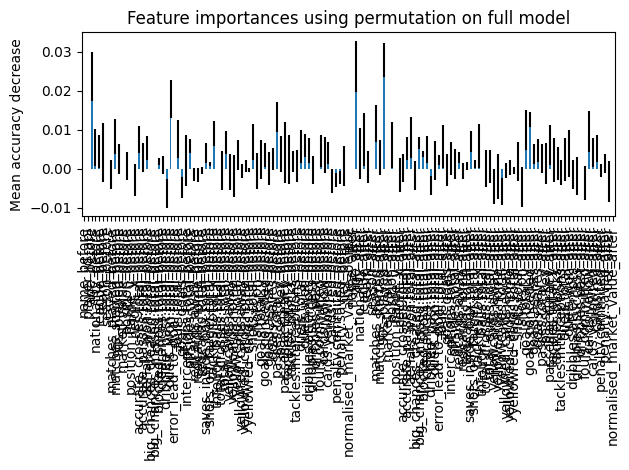

In [120]:
result = permutation_importance(
    mlp, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)

forest_importances = pd.Series(result.importances_mean, index=X_test.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()